# Team 5A09 DMA Course Project : 
## Sina Weibo Interaction Prediction Challenge
![](weibo.jpg)
## Modelling Phase
 1. - Team ID             - 5A09
      - Sem                 - 5TH 
      - Div                 - 'A'
      - School              - KLE Technological university
   
   
   2. - Topic ID            - 5ADMACP14
      - Project Title       - Sina Weibo Intereaction Prediction
   
   
   3. Problem Statement     - To predict the user behaviors such as forwarding, commenting and liking on Sina Weibo Microblogging site.
   
   
   4. - Team Leader         - Deepti Nadkarni         - 01FE16BCS062 (Roll no-58)
      - Members   
         - Apoorva Malemath     - 01FE16BCS041 (Roll no-39)
         - Arundati Dixit       - 01FE16BCS046 (Roll no-44)
         - Ashish Kar           - 01FE16BCS047 (Roll no-45) 
    

# ----------------------Pre-Processing Highlights---------------------------------

## 1. TRANSLATION TO ENGLISH CONTENT

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import statsmodels.api as sm
import import_ipynb
from evaluation import precision

importing Jupyter notebook from evaluation.ipynb


In [5]:
df1=pd.read_csv("G://DMA_PROJECT//preprocessed_1.csv")
df2=pd.read_csv("G://DMA_PROJECT//preprocessed_2.csv")
frames=[df1,df2]
traintrans=pd.concat(frames)

In [4]:
traintrans.head(5)

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_spchar,non_emoji_content,en_content,Unnamed: 1
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0.0,0.0,0.0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:41:29,0.0,['(' ')' '#' '#' '#' '#' '#' '#' '#' ...,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,Lijiang Tourism (sz002033) # ## stock stocks F...,NaN
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0.0,0.0,0.0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,2015-02-14,12:49:58,1.0,['#' '#' '，' '。' '@' '，' '！' '，' '╮' ...,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,Chen Ling Ding # # red envelopes to make money...,NaN
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0.0,0.0,0.0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,2015-03-31,13:58:06,0.0,['。' '。' '。' '~' '，'],淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,Taobao these sucker. . . Industrial gas fire n...,NaN
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0.0,4.0,3.0,看点不能说的，你们都懂[笑cry],2015-06-11,20:39:57,0.0,['，' '[' ']'],看点不能说的，你们都懂[笑cry],"Aspect can not say, you know everything [laugh...",NaN
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0.0,0.0,0.0,111多张,2015-03-10,18:02:38,0.0,[],111多张,Over 111 Zhang,NaN


In [8]:
traintrans.columns

Index(['u_id', 'm_id', 'forward_count', 'comment_count', 'like_count',
       'content', 'date', 'time', 'content_media_count', 'content_spchar',
       'non_emoji_content', 'en_content', 'Unnamed: 1'],
      dtype='object')

## 2. BOW as factor

## Processes Involved for Text Processing:
### REMOVAL OF NOISE - URL
### REMOVAL OF STOPWORDS
### STEMMING
### LEMMATIZATION
### CONVERSION TO LOWERCASE 
### REMOVAL OF NUMBERS
### REMOVAL OF PUNCTUATION

In [60]:
trainpp=pd.read_csv("G://DMA_PROJECT//preprocessed.csv")

In [61]:
trainpp.head(10)

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_spchar,...,Stemming,Stemmingle,lemmatization,lemmatizationtl,lower,lowerrmum,no_num,lowerrnum,no_numrp,no_punc
0,ef132857ae5c47ff0aa2ce251436258c,a09fd98a3fddd174f281e0b56d14c6fc,0,0,0,刚刚评论了豆丁文档:有机化学光谱 化学研究生用的课件 '简单看下，还不错，谢谢分享' htt...,2015-04-22,15:39:05,1.0,"[':' ""'"" '，' '，' ""'"" ':' '/' '/' '.' ...",...,"['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...",NaN,"['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', ':', '...","['just', 'comment', 'doud', 'document', 'organ..."
1,97775929a27fdb7e0da1e8c64bf796b4,c44d9db6c197a921eb2635017b733d41,0,0,0,小米蓝牙有码没@雷军,2015-06-27,19:15:11,0.0,['@'],...,"['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...",NaN,"['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '...","['millet', 'bluetooth', 'code', 'ha', 'not', '..."
2,875a4a77b339d93f819e2c4de5bd0b57,423c182a9ab1a2ba71f97721717607dc,0,0,0,#IT#【港报：游戏女主播收入颇高 卖弄色情是家常便饭】据香港《明报》网站4月9日报道，游戏...,2015-04-12,17:15:18,1.0,['#' '#' '【' '：' '】' '《' '》' '，' '，' ...,...,"['#', 'IT', '#', '[', 'hong', 'kong', 'newspap...","['#', 'IT', '#', '[', 'hong', 'kong', 'newspap...","['#', 'IT', '#', '[', 'hong', 'kong', 'newspap...","['#', 'IT', '#', '[', 'hong', 'kong', 'newspap...","['#', 'it', '#', '[', 'hong', 'kong', 'newspap...",NaN,"['#', 'it', '#', '[', 'hong', 'kong', 'newspap...","['#', 'it', '#', '[', 'hong', 'kong', 'newspap...","['#', 'it', '#', '[', 'hong', 'kong', 'newspap...","['it', '[', 'hong', 'kong', 'newspap', 'game',..."
3,935dd42bcab833225d96eb826e2fb959,119426d163f5f77fe626d3e3701289e4,0,1,0,【王宝臣：2015年企业站优化方向】本篇文章的话题主要是围绕站群形式来降低从web2.0反垃...,2015-06-22,10:20:49,1.0,['【' '：' '】' '.' '，' '，' '-' ':' '/' ...,...,"['[', 'wangbao', 'chen', ':', '2015', 'compani...","['[', 'wangbao', 'chen', ':', '2015', 'compani...","['[', 'wangbao', 'chen', ':', '2015', 'compani...","['[', 'wangbao', 'chen', ':', '2015', 'compani...","['[', 'wangbao', 'chen', ':', 'compani', 'opti...",NaN,"['[', 'wangbao', 'chen', ':', 'compani', 'opti...","['[', 'wangbao', 'chen', ':', 'compani', 'opti...","['[', 'wangbao', 'chen', ':', 'compani', 'opti...","['[', 'wangbao', 'chen', 'compani', 'optim', '..."
4,c9ef6a4615183d652a777771599dcfbe,b135c8123b51ccd53c26dc76fa1d3ed4,0,0,0,#成懋的红包#小年抢个好彩头！我在成懋 的红包中抽到了@快的打车 提供的“快的打车6元红包”...,2015-02-11,10:16:33,1.0,['#' '#' '！' '@' '“' '”' '，' '，' '！' ...,...,"['#', '#', 'To', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'To', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'To', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'To', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'to', 'mao', ""'s"", 'littl', 'red', ...",NaN,"['#', '#', 'to', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'to', 'mao', ""'s"", 'littl', 'red', ...","['#', '#', 'to', 'mao', ""'s"", 'littl', 'red', ...","['to', 'mao', ""'s"", 'littl', 'red', 'envelop',..."
5,ca1010cf23e9327e9a68358f5a0f7484,a3dafc001f7e8d8a2169a2625d698cc3,0,1,0,今年最美妙的事情 一是牵这旺去广场，然后看它打滚，旺想快步逃走，紧接这被我快步抓住。二是晚自...,2015-02-17,08:00:38,0.0,['，' '，' '，' '。' '，' '，' '，' '！'],...,"['the', 'most', 'wonder', 'thing', 'thi', 'yea...","['the', 'most', 'wonder', 'thing', 'thi', 'yea...","['the', 'most', 'wonder', 'thing', 'thi', 'yea...","['the', 'most', 'wonder', 'thing', 'thi', 'yea...","['the', 'most', 'wonder', 'thing', 'thi', 'yea...",NaN,"['the', 'most', 'wonder', 'thing', 'thi', 'yea...","['the', 'most',

In [62]:
trainpp.columns

Index(['u_id', 'm_id', 'forward_count', 'comment_count', 'like_count',
       'content', 'date', 'time', 'content_media_count', 'content_spchar',
       'non_emoji_content', 'en_content', 'Unnamed: 1', 'en_contenturl',
       'url_rem', 'en_contentsw', 'Stopwrod_removed', 'Stopword_removed',
       'en_contentst', 'Stemming', 'Stemmingle', 'lemmatization',
       'lemmatizationtl', 'lower', 'lowerrmum', 'no_num', 'lowerrnum',
       'no_numrp', 'no_punc'],
      dtype='object')

## 3. UID Stats as factor

In [6]:
stat=pd.read_csv("train_uid_stat.csv")

In [7]:
stat.head(10)

,u_id,forward_min,forward_max,forward_median,forward_mean,comment_min,comment_max,comment_median,comment_mean,like_min,like_max,like_median,like_mean
0,000127c6126e2b0019f255ed21ac1cb7,0,1,0,0,0,0,0,0,0,0,0,0
1,0001565a5edece1669577e2ace9a6a3d,0,0,0,0,0,1,0,0,0,0,0,0
2,00033a6513b86b2705de9ffa9d37ffb6,0,0,0,0,0,0,0,0,0,1,0,0
3,0004fe2742507420eaa73e119dc83ac5,0,6,0,0,0,1,0,0,0,1,0,0
4,000c663a24a2f91f4ba156fcd4f8b9f2,0,1,0,0,0,7,0,0,0,6,0,0
5,000ce19d2fccb1f22421bec50bf25b08,0,0,0,0,0,0,0,0,0,0,0,0
6,000d7bf7406392b2212dfb4fe907d946,0,0,0,0,0,0,0,0,0,0,0,0
7,0012edb614365800e901c7f2b47e9129,0,0,0,0,0,4,0,1,0,0,0,0
8,001349a053bdecf1a71960f29288ced1,0,0,0,0,0,1,0,0,0,1,0,0
9,0015c42ec93854687a258a7f170c6acf,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
stat.columns

Index(['u_id', 'forward_min', 'forward_max', 'forward_median', 'forward_mean',
       'comment_min', 'comment_max', 'comment_median', 'comment_mean',
       'like_min', 'like_max', 'like_median', 'like_mean'],
      dtype='object')

## 4. Initial Predictions without Model and Analysis
### Putting known values of stats in predict dataset without any computation and finding accuracy

### Best Statistical Factors and Default Value

![](overall1.png)

### Analysis

#### 1. The Best Default Value is 0 1 1 ( F C L) which can be used for new users in predict dataset or as a default value
#### 2. The Highest Accuracy is for Median factor which is considerable as per current standings in Sina Weibo leaderbord. (Top Accuracy: 41.73%)
#### 3. We further wanted to add more factors from content like emoji and media, time etc. with these factors to better our accuracy 

# --------------------------Factors Considered For Modelling--------------------------------

In [10]:
df1=pd.read_csv("G://DMA_PROJECT//weibo_train1_cptsd.csv")
df2=pd.read_csv("G://DMA_PROJECT//weibo_train2_cptsd.csv")
frames=[df1,df2]
train_dataset=pd.concat(frames)
predict_dataset=pd.read_csv("G://DMA_PROJECT//weibo_predict_cptsd.csv")

In [12]:
train_dataset.head(5)

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_#_count,...,comment_max,comment_median,comment_mean,like_min,like_max,like_median,like_mean,default_forward,default_comment,default_like
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:41:29,0.0,10.0,...,48,0,0,0,5,0,0,0,1,1
1,d38e9bed5d98110dc2489d0d1cac3c2a,00755196c77936bf44656ada98291c59,0,0,0,想开了就是幸福，想不开就是痛苦…http://t.cn/RLqzYa1,2015-07-13,19:24:50,1.0,0.0,...,48,0,0,0,5,0,0,0,1,1
2,d38e9bed5d98110dc2489d0d1cac3c2a,4fedf3888b1e16592f0e0bdc8b393845,0,0,0,300419浩丰科技#股票##股神##股市##炒股##财经##理财##投资# 股票庄家，要求...,2015-03-14,21:22:57,0.0,14.0,...,48,0,0,0,5,0,0,0,1,1
3,d38e9bed5d98110dc2489d0d1cac3c2a,91be0b8612265aae32725cd4fa80b222,0,0,0,女性被人占便宜从来不生气，是什么心态？http://t.cn/R2n2pRz,2015-06-18,16:25:36,1.0,0.0,...,48,0,0,0,5,0,0,0,1,1
4,d38e9bed5d98110dc2489d0d1cac3c2a,bd2af99ecf1298f5539f0ddfcdd3ed64,0,0,0,网宿科技(sz300017)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:35:31,0.0,10.0,...,48,0,0,0,5,0,0,0,1,1


In [13]:
train_dataset.columns

Index(['u_id', 'm_id', 'forward_count', 'comment_count', 'like_count',
       'content', 'date', 'time', 'content_media_count', 'content_#_count',
       'content_@_count', 'content_?_count', 'content_!_count',
       'content_length', 'content_emoji_count', 'hour', 'min', 'sec',
       'forward_min', 'forward_max', 'forward_median', 'forward_mean',
       'comment_min', 'comment_max', 'comment_median', 'comment_mean',
       'like_min', 'like_max', 'like_median', 'like_mean', 'default_forward',
       'default_comment', 'default_like'],
      dtype='object')

## 1. Content Factors
### 1a) content_media_count
### 1b) content_#_count
### 1c) content_@_count
### 1d) content_?_count
### 1e) content_!_count
### 1f) content_length
### 1g) content_emoji_count
## 2. Time Factors
### 2a) hour
### 2b) min
### 2c) sec
## 3. Statistical Factors
### 3a) forward_min
### 3b) forward_max
### 3c) forward_median
### 3d) forward_mean
### 3e) comment_min
### 3f) comment_max
### 3g) comment_median
### 3h) comment_mean
### 3i) like_min
### 3j) like_max
### 3k) like_median
### 3l)  like_mean
## 4. Default Values
### 4a) default_forward
### 4b) default_comment
### 4c) default_like

## Total Factors: 24

# ---------------------------------Model Building Pre requisite-----------------------------------

In [34]:
train_month1=pd.read_csv("G://DMA_PROJECT//weibo_train_feb_cptsd.csv")
train_month2=pd.read_csv("G://DMA_PROJECT//weibo_train_march_cptsd.csv")
train_month3=pd.read_csv("G://DMA_PROJECT//weibo_train_april_cptsd.csv")
train_month4=pd.read_csv("G://DMA_PROJECT//weibo_train_may_cptsd.csv")
train_month5=pd.read_csv("G://DMA_PROJECT//weibo_train_june_cptsd.csv")
train_month6=pd.read_csv("G://DMA_PROJECT//weibo_train_july_cptsd.csv")

In [35]:
frames1=[train_month1,train_month2,train_month3,train_month4,train_month5]
train=pd.concat(frames1)
predict=train_month6

## Library used for modelling: sklearn (linear model)

# -----------------------------------------Modelling--------------------------------------------------

## 1. Some Models and Inferences

### 1a) New Factor Analysis

## Model 1:  (Factors: Media, #, @, ?, !, Length, Emoji)

In [17]:
X_train=train[["content_media_count","content_#_count","content_@_count","content_?_count","content_!_count","content_length","content_emoji_count"]]
Y_train=train[["forward_count","comment_count","like_count"]]
X_test=predict[["content_media_count","content_#_count","content_@_count","content_?_count","content_!_count","content_length","content_emoji_count"]]
Y_test=predict[["forward_count","comment_count","like_count"]]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

pd.options.mode.use_inf_as_na = True
X_train.fillna(X_train.max(),inplace=True)
X_test.fillna(X_test.max(),inplace=True)

lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
pred=pred.round()
pred=(np.maximum(pred,0.))

(1044681, 7) (1044681, 3)
(184937, 7) (184937, 3)


G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
print(pred[0:5])
print(model.coef_)
print(model.intercept_)

[[ 4.  1.  2.]
 [ 3.  2.  3.]
 [ 3.  1.  1.]
 [ 7.  1.  2.]
 [ 9.  2.  3.]]
[[-2.13937044 -0.36595303 -0.29844433 -0.04270781 -0.20884535  0.05323583
  -0.11373958]
 [-1.46356558 -0.15223682 -0.02946097 -0.00326344 -0.04880305  0.00769467
   0.1747673 ]
 [-2.6330917  -0.13749083 -0.32811723 -0.01394959 -0.071054    0.01544652
   0.26583545]]
[ 1.31437859  1.76293348  2.98461306]


In [19]:
np.savetxt("G://DMA_PROJECT//weibo_predict_result2.csv",pred,delimiter=',',header="forward_count,comment_count,like_count",comments="")
result=pd.read_csv("G://DMA_PROJECT//weibo_predict_result2.csv")

In [20]:
train_real_pred = Y_test
forward=result['forward_count'].values
comment=result['forward_count'].values
like=result['forward_count'].values
train_real_pred['fp'],train_real_pred['cp'],train_real_pred['lp'] = forward,comment,like
print ("Score on the training set:{0:.2f}%".format(precision(train_real_pred.values)*100))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Score on the training set:13.69%


## Model 2: (Factors: Media, Length, Emoji)

In [22]:
X_train=train[["content_media_count","content_length","content_emoji_count"]]
Y_train=train[["forward_count","comment_count","like_count"]]
X_test=predict[["content_media_count","content_length","content_emoji_count"]]
Y_test=predict[["forward_count","comment_count","like_count"]]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

pd.options.mode.use_inf_as_na = True
X_train.fillna(X_train.max(),inplace=True)
X_test.fillna(X_test.max(),inplace=True)

lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
pred=pred.round()
pred=(np.maximum(pred,0.))

(1044681, 3) (1044681, 3)
(184937, 3) (184937, 3)


G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
print(pred[0:5])
print(model.coef_)
print(model.intercept_)

[[ 4.  1.  2.]
 [ 3.  2.  3.]
 [ 3.  1.  1.]
 [ 7.  1.  2.]
 [ 8.  1.  3.]]
[[-2.19780299  0.05049652 -0.14777505]
 [-1.47377848  0.00679751  0.16018448]
 [-2.68756793  0.01390734  0.25398113]]
[ 1.23425639  1.73473692  2.94322868]


In [24]:
np.savetxt("G://DMA_PROJECT//weibo_predict_result3.csv",pred,delimiter=',',header="forward_count,comment_count,like_count",comments="")
result=pd.read_csv("G://DMA_PROJECT//weibo_predict_result3.csv")

In [25]:
train_real_pred = Y_test
forward=result['forward_count'].values
comment=result['forward_count'].values
like=result['forward_count'].values
train_real_pred['fp'],train_real_pred['cp'],train_real_pred['lp'] = forward,comment,like
print ("Score on the training set:{0:.2f}%".format(precision(train_real_pred.values)*100))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Score on the training set:13.79%


## Model 3:  (Factors:Time: (Hour, Min, Sec), Media, Length, Emoji)

In [27]:
X_train=train[["content_media_count","content_length","content_emoji_count","hour","min","sec"]]
Y_train=train[["forward_count","comment_count","like_count"]]
X_test=predict[["content_media_count","content_length","content_emoji_count","hour","min","sec"]]
Y_test=predict[["forward_count","comment_count","like_count"]]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

pd.options.mode.use_inf_as_na = True
X_train.fillna(X_train.max(),inplace=True)
X_test.fillna(X_test.max(),inplace=True)

lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
pred=pred.round()
pred=(np.maximum(pred,0.))

(1044681, 6) (1044681, 3)
(184937, 6) (184937, 3)


G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
print(pred[0:5])
print(model.coef_)
print(model.intercept_)

[[  4.   1.   1.]
 [  1.   2.   3.]
 [  2.   1.   1.]
 [  4.   1.   1.]
 [ 10.   2.   4.]]
[[-2.16126691  0.04995623 -0.14079719  0.09097968 -0.05802816 -0.03386975]
 [-1.46714342  0.0068272   0.15966872  0.02589544 -0.00483482 -0.00418282]
 [-2.6652836   0.0137497   0.25624217  0.07054347 -0.03242168 -0.01633076]]
[ 2.62859063  1.63033587  3.36618167]


In [29]:
np.savetxt("G://DMA_PROJECT//weibo_predict_result4.csv",pred,delimiter=',',header="forward_count,comment_count,like_count",comments="")
result=pd.read_csv("G://DMA_PROJECT//weibo_predict_result4.csv")

In [30]:
train_real_pred = Y_test
forward=result['forward_count'].values
comment=result['forward_count'].values
like=result['forward_count'].values
train_real_pred['fp'],train_real_pred['cp'],train_real_pred['lp'] = forward,comment,like
print ("Score on the training set:{0:.2f}%".format(precision(train_real_pred.values)*100))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Score on the training set:15.41%


### Analysis: New Factors not yeilding very satisfactory results

## 1 b) Combination with old factors

## Model 4: (Factors: Median,Time: (Hour, Min, Sec), Media, Length, Emoji)

In [40]:
X_train=train[["content_media_count","content_length","content_emoji_count","hour","min","sec","forward_median","comment_median","like_median"]]
Y_train=train[["forward_count","comment_count","like_count"]]
X_test=predict[["content_media_count","content_length","content_emoji_count","hour","min","sec","forward_median","comment_median","like_median"]]
Y_test=predict[["forward_count","comment_count","like_count"]]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

pd.options.mode.use_inf_as_na = True
X_train.fillna(X_train.max(),inplace=True)
X_test.fillna(X_test.max(),inplace=True)

lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
pred=pred.round()
pred=(np.maximum(pred,0.))

(1044681, 9) (1044681, 3)
(184937, 9) (184937, 3)


G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
print(pred[0:5])
print(model.coef_)
print(model.intercept_)

[[  3.   4.   3.]
 [  3.   4.   3.]
 [  3.   4.   3.]
 [ 13.   7.   8.]
 [  2.   2.   2.]]
[[ -2.63364425e-01   1.91174376e-02   5.54642973e-02   3.76150971e-02
    5.27858190e-04   1.68362209e-03   1.58279691e+00   1.67729136e+00
   -2.93017304e-01]
 [ -6.60961017e-01   2.55079540e-03   1.00504045e-01   1.24809468e-02
    2.35146358e-03   1.20243289e-03   7.17940397e-02   1.55348700e+00
    4.45266999e-03]
 [ -8.70474303e-01   9.23346652e-04   5.98607519e-02   2.34643687e-02
    4.45920014e-05   1.52298289e-03   1.45839466e-01   3.91354761e-01
    1.06591334e+00]]
[-1.04897282  0.36245024  0.43019058]


## Analysis: Weights assigned to Statistical Factors is higher

In [42]:
np.savetxt("G://DMA_PROJECT//weibo_predict_result5.csv",pred,delimiter=',',header="forward_count,comment_count,like_count",comments="")
result=pd.read_csv("G://DMA_PROJECT//weibo_predict_result5.csv")

In [44]:
train_real_pred = Y_test
train_real_pred['fp']=result['forward_count'].values
train_real_pred['cp']=result['comment_count'].values
train_real_pred['lp']=result['like_count'].values
train_real_pred=train_real_pred.round()
print ("Score on the training set:{0:.2f}%".format(precision(train_real_pred.values)*100))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

Score on the training set:32.47%


## Analysis: 
## 1. Median factor boosted accuracy yet again
## 2. Separate predictions are necessory for F C L as in cases like Forward won't need Like Median and Comment Median. Also Each of F C L can have different best factors

## 1 c) Separate prediction Models for FCL and Final Model

## Model 5: (Factors: Median, Min, Max, Media, Emoji)

In [45]:
X_train1=train[["forward_median","forward_mean","forward_min","content_media_count","content_emoji_count"]]
Y_train1=train[["forward_count"]]
X_test1=predict[["forward_median","forward_mean","forward_min","content_media_count","content_emoji_count"]]
Y_test1=predict[["forward_count"]]

X_train2=train[["comment_median","comment_mean","comment_min","content_media_count","content_emoji_count"]]
Y_train2=train[["comment_count"]]
X_test2=predict[["comment_median","comment_mean","comment_min","content_media_count","content_emoji_count"]]
Y_test2=predict[["comment_count"]]

X_train3=train[["like_median","like_mean","like_min","content_media_count","content_emoji_count"]]
Y_train3=train[["like_count"]]
X_test3=predict[["like_median","like_mean","like_min","content_media_count","content_emoji_count"]]
Y_test3=predict[["like_count"]]

pd.options.mode.use_inf_as_na = True
X_train1.fillna(X_train1.max(),inplace=True)
X_test1.fillna(X_test1.max(),inplace=True)
X_train2.fillna(X_train2.max(),inplace=True)
X_test2.fillna(X_test2.max(),inplace=True)
X_train3.fillna(X_train3.max(),inplace=True)
X_test3.fillna(X_test3.max(),inplace=True)

print(X_train1.shape,Y_train1.shape)
print(X_test1.shape,Y_test1.shape)

print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(1044681, 5) (1044681, 1)
(184937, 5) (184937, 1)
(1044681, 5) (1044681, 1)
(184937, 5) (184937, 1)
(1044681, 5) (1044681, 1)
(184937, 5) (184937, 1)


In [46]:
lm1=linear_model.LinearRegression()
model1=lm1.fit(X_train1,Y_train1)
pred1=lm1.predict(X_test1)
pred1=pred1.round()
pred1=(np.maximum(pred1,0.))

lm2=linear_model.LinearRegression()
model2=lm2.fit(X_train2,Y_train2)
pred2=lm2.predict(X_test2)
pred2=pred2.round()
pred2=(np.maximum(pred2,0.))

lm3=linear_model.LinearRegression()
model3=lm3.fit(X_train3,Y_train3)
pred3=lm3.predict(X_test3)
pred3=pred3.round()
pred3=(np.maximum(pred3,0.))

In [48]:
print(pred1[0:5])
print(model1.coef_)
print(model1.intercept_)

print(pred2[0:5])
print(model2.coef_)
print(model2.intercept_)

print(pred3[0:5])
print(model3.coef_)
print(model3.intercept_)

[[  2.]
 [  2.]
 [  2.]
 [ 13.]
 [ 12.]]
[[ 0.44920013  0.84888874 -0.28999774  0.32885539  0.01281363]]
[-0.20643995]
[[ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 3.]]
[[-0.23456946  1.16942801  0.04188341 -0.33471336  0.02751557]]
[ 0.19200623]
[[ 3.]
 [ 3.]
 [ 3.]
 [ 7.]
 [ 4.]]
[[ 0.13417819  0.93515754 -0.20071856 -0.64595136 -0.11687872]]
[ 0.47901386]


In [47]:
np.savetxt("G://DMA_PROJECT//weibo_predict_resultc1.csv",pred1,delimiter=',',header="forward_count",comments="")
result1=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultc1.csv")
np.savetxt("G://DMA_PROJECT//weibo_predict_resultc2.csv",pred2,delimiter=',',header="comment_count",comments="")
result2=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultc2.csv")
np.savetxt("G://DMA_PROJECT//weibo_predict_resultc3.csv",pred3,delimiter=',',header="like_count",comments="")
result3=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultc3.csv")

In [49]:
train_real_pred = pd.concat([Y_test1,Y_test2,Y_test3],axis=1)
train_real_pred['fp']=result1['forward_count']
train_real_pred['cp']=result2['comment_count']
train_real_pred['lp']=result3['like_count']
train_real_pred=train_real_pred.round()
print ("Score on the training set:{0:.4f}%".format(precision(train_real_pred.values)*100))

Score on the training set:38.0378%


## Analysis: This is the best accuracy we got out of all the models we tried 

## We got the same accuracy for another model....

## Model 6: (Factors: Median, Min, Max, Media, Emoji, Default Values)

In [50]:
X_train1=train[["forward_median","forward_mean","forward_min","content_media_count","content_emoji_count","default_forward"]]
Y_train1=train[["forward_count"]]
X_test1=predict[["forward_median","forward_mean","forward_min","content_media_count","content_emoji_count","default_forward"]]
Y_test1=predict[["forward_count"]]

X_train2=train[["comment_median","comment_mean","comment_min","content_media_count","content_emoji_count","default_comment"]]
Y_train2=train[["comment_count"]]
X_test2=predict[["comment_median","comment_mean","comment_min","content_media_count","content_emoji_count","default_comment"]]
Y_test2=predict[["comment_count"]]

X_train3=train[["like_median","like_mean","like_min","content_media_count","content_emoji_count","default_like"]]
Y_train3=train[["like_count"]]
X_test3=predict[["like_median","like_mean","like_min","content_media_count","content_emoji_count","default_like"]]
Y_test3=predict[["like_count"]]

pd.options.mode.use_inf_as_na = True
X_train1.fillna(X_train1.max(),inplace=True)
X_test1.fillna(X_test1.max(),inplace=True)
X_train2.fillna(X_train2.max(),inplace=True)
X_test2.fillna(X_test2.max(),inplace=True)
X_train3.fillna(X_train3.max(),inplace=True)
X_test3.fillna(X_test3.max(),inplace=True)

print(X_train1.shape,Y_train1.shape)
print(X_test1.shape,Y_test1.shape)

print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

G:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(1044681, 6) (1044681, 1)
(184937, 6) (184937, 1)
(1044681, 6) (1044681, 1)
(184937, 6) (184937, 1)
(1044681, 6) (1044681, 1)
(184937, 6) (184937, 1)


In [51]:
lm1=linear_model.LinearRegression()
model1=lm1.fit(X_train1,Y_train1)
pred1=lm1.predict(X_test1)
pred1=pred1.round()
pred1=(np.maximum(pred1,0.))

lm2=linear_model.LinearRegression()
model2=lm2.fit(X_train2,Y_train2)
pred2=lm2.predict(X_test2)
pred2=pred2.round()
pred2=(np.maximum(pred2,0.))

lm3=linear_model.LinearRegression()
model3=lm3.fit(X_train3,Y_train3)
pred3=lm3.predict(X_test3)
pred3=pred3.round()
pred3=(np.maximum(pred3,0.))

In [52]:
print(pred1[0:5])
print(model1.coef_)
print(model1.intercept_)

print(pred2[0:5])
print(model2.coef_)
print(model2.intercept_)

print(pred3[0:5])
print(model3.coef_)
print(model3.intercept_)

[[  2.]
 [  2.]
 [  2.]
 [ 13.]
 [ 12.]]
[[ 0.44920013  0.84888874 -0.28999774  0.32885539  0.01281363  0.        ]]
[-0.20643995]
[[ 4.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 3.]]
[[-0.23456946  1.16942801  0.04188341 -0.33471336  0.02751557  0.        ]]
[ 0.19200623]
[[ 3.]
 [ 3.]
 [ 3.]
 [ 7.]
 [ 4.]]
[[ 0.13417819  0.93515754 -0.20071856 -0.64595136 -0.11687872  0.        ]]
[ 0.47901386]


In [53]:
np.savetxt("G://DMA_PROJECT//weibo_predict_resultd1.csv",pred1,delimiter=',',header="forward_count",comments="")
result1=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultd1.csv")
np.savetxt("G://DMA_PROJECT//weibo_predict_resultd2.csv",pred2,delimiter=',',header="comment_count",comments="")
result2=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultd2.csv")
np.savetxt("G://DMA_PROJECT//weibo_predict_resultd3.csv",pred3,delimiter=',',header="like_count",comments="")
result3=pd.read_csv("G://DMA_PROJECT//weibo_predict_resultd3.csv")

In [54]:
train_real_pred = pd.concat([Y_test1,Y_test2,Y_test3],axis=1)
train_real_pred['fp']=result1['forward_count']
train_real_pred['cp']=result2['comment_count']
train_real_pred['lp']=result3['like_count']
train_real_pred=train_real_pred.round()
print ("Score on the training set:{0:.4f}%".format(precision(train_real_pred.values)*100))

Score on the training set:38.0378%


## Analysis: Since Model with less factors is more preferred so Model 5 is the Final Model

# -----------------------------------------Final Model Analysis-------------------------------------

## Factors for forward: "forward_median","forward_mean","forward_min","content_media_count","content_emoji_count"
## Factors for comment: "comment_median","comment_mean","comment_min","content_media_count","content_emoji_count"
## Factors for like: "like_median","like_mean","like_min","content_media_count","content_emoji_count"

## Linear Equations:
## forward_count = 0.44 x forward_median + 0.84 x forward_mean - 0.28 x forward_min + 0.32 x content_media_count + 0.01 x content_emoji_count - 0.2

## comment_count = 0.23 x comment_median + 1.16 x comment_mean - 0.04 x comment_min - 0.33 x content_media_count + 0.02 x content_emoji_count + 0.19

## like_count = 0.13 x like_median + 0.93 x like_mean - 0.2 x like_min - 0.64 x content_media_count - 0.11 x content_emoji_count + 0.47

# Final Precision: 38.04%

# Graphical Analysis of final Model

### Forward Predictions

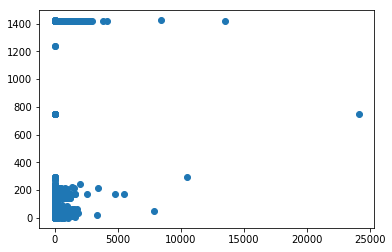

In [57]:
plt.scatter(Y_test1,pred1)

### Comment Predictions

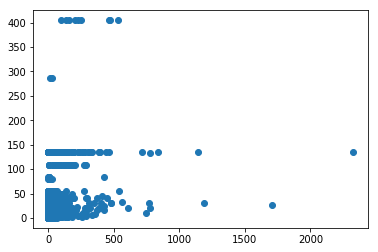

In [58]:
plt.scatter(Y_test2,pred2)

### Like Predictions

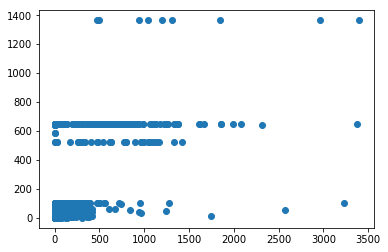

In [59]:
plt.scatter(Y_test3,pred3)

## Analysis: Better prediction for lower F C L

# Scope and Learnings


## 1. Though we got satisfactory results from our above factors, Sina Weibo Prediction consists of vast factors for prediction and further new factors are very much possible to find like BOW and polarity which can increase the accuracy. More In depth analysis for these microblog site factors can lead to more better results. 
## 2. Due to some factors hard to process like BOW and Polarity for relatively large data we might not have used them for selected models used here but these can also be used for better results.
## 3. We have considered BOW and polarity for approx first 10K tuples and computed accuracy.This work can further be carried out.


# Limitation


## Prediction for higher F C L is less accurate